# Word Cloud Generation

## 1. Necessary Python libraries are loaded

In [1]:
# Import libraries 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## 2. Datasets are loaded from CSV file

In [2]:
# Load csv file with no index column so each row is identified by the movie name
reviewsdf = pd.read_csv("userReviewsAllGenres.csv", index_col=0)

# Display top 10 rows of dataset
reviewsdf.head(10)

,user_review,user_review_permalink
movie,,
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...,https://www.imdb.com/review/rw4478401/
Redcon-1 - Army of the Dead,The goal of this movie is to save the scientis...,https://www.imdb.com/review/rw5401794/
Redcon-1 - Army of the Dead,The film is generally very ordinary in all asp...,https://www.imdb.com/review/rw4705208/
Redcon-1 - Army of the Dead,Did it's job. Fast paced. Shedloads of blood a...,https://www.imdb.com/review/rw4710164/
Redcon-1 - Army of the Dead,"I'm a massive zombie movie fan, this film is a...",https://www.imdb.com/review/rw4943818/
Redcon-1 - Army of the Dead,Me and my other half were zombie extras in thi...,https://www.imdb.com/review/rw4715069/
Redcon-1 - Army of the Dead,The trailer had a better storyline than the ac...,https://www.imdb.com/review/rw4613750/
Redcon-1 - Army of the Dead,"This is a B-Movie, to be sure, with the requis...",https://www.imdb.com/review/rw4830865/
Redcon-1 - Army of the Dead,I stopped watching the movie after 20min and s...,https://www.imdb.com/review/rw4698116/


## 3. Shape of dataset is identified

In [3]:
# Identify shape of dataset
print("There are {} observations / reviews and {} features in this dataset. \n".format(reviewsdf.shape[0], reviewsdf.shape[1]))

There are 6239 observations / reviews and 2 features in this dataset. 



## 4. Dataset is transformed

In [4]:
# Group by movie names so all reviews are in one field
reviewsdf['user_review'] = reviewsdf.groupby(['movie'])['user_review'].transform(lambda x : ' '.join(x))

# Display top 5 rows of dataset
reviewsdf.head()

,user_review,user_review_permalink
movie,,
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...,https://www.imdb.com/review/rw4478401/
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...,https://www.imdb.com/review/rw5401794/
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...,https://www.imdb.com/review/rw4705208/
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...,https://www.imdb.com/review/rw4710164/
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...,https://www.imdb.com/review/rw4943818/


In [5]:
# Drop link column
reviewsdf = reviewsdf.drop(['user_review_permalink'], axis = 1)
reviewsdf.head()

,user_review
movie,
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...
Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...


In [6]:
# Check for any duplicate rows in the dataset
print(f"{reviewsdf.duplicated().sum()} duplicated rows")

5989 duplicated rows


In [7]:
# Remove duplicate rows
reviewsdf = reviewsdf.drop_duplicates()
reviewsdf = reviewsdf.reset_index()
reviewsdf

,movie,user_review
0,Redcon-1 - Army of the Dead,Given the word I had heard about this zombie f...
1,The Professor and the Madman,"This movie, its story and interpretation fall ..."
2,James Bond 007: Spectre,I went into this movie blank.I had never seen ...
3,Cinderella,Love this film! no it is not like the original...
4,Mamma Mia! Here We Go Again!,"First Mamma Mia, even if not the greatest movi..."
...,...,...
245,Der König der Löwen,So anyone else notice it has a high score of 7...
246,Spione Undercover - Eine wilde Verwandlung,We loved Spies in Disguise because it's cool a...
247,Mary Poppins' Rückkehr,"I went to see this, against my basic instinct,..."
248,Teenage Mutant Ninja Turtles: Out of the Shadows,I was pretty disappointed with this movie. My ...


In [8]:
# Lower case the text in the reviews column
reviewsdf["user_review"] = reviewsdf["user_review"].str.lower()
reviewsdf.head(10)

,movie,user_review
0,Redcon-1 - Army of the Dead,given the word i had heard about this zombie f...
1,The Professor and the Madman,"this movie, its story and interpretation fall ..."
2,James Bond 007: Spectre,i went into this movie blank.i had never seen ...
3,Cinderella,love this film! no it is not like the original...
4,Mamma Mia! Here We Go Again!,"first mamma mia, even if not the greatest movi..."
5,Nachts im Museum - Das geheimnisvolle Grabmal,watching night at the museum is like watching ...
6,Christopher Robin,"i'm usually in accord with critic reviews, but..."
7,Exodus: Götter und Könige,it's not any one thing especially that is part...
8,Dirty Grandpa,have you ever noticed that often when we are o...
9,The November Man,the last film i saw brosnan in - love punch - ...


## 5. First row of data is sampled

In [9]:
first_review = reviewsdf.user_review[0]
print(f"There are {len(first_review)} words in the first review of {reviewsdf.index[0]}.")
first_review

There are 15827 words in the first review of 0.


'given the word i had heard about this zombie film, i was disappointed with the execution but - being a fellow creative - i don\'t want to dwell on the negatives so will get those out of the way early on before concentrating on what was done well.1. acting / characters: the acting was not good in this film. some of the dialogue was both clunky and cheesy. i found myself not really knowing much about the characters and - as a result - i didn\'t care about them.2. the run time: the film was way, way, way too long. at least an hour too long. it was action scene, zombie stuff, internal conflict with the soldiers, repeat the above for over two hours. none of the action sequences brought anything new to what you were watching so - when you saw the first one, you\'d pretty much seen the rest of them.3. script / plot: nothing we haven\'t seen before but not as executed as well as it could have been. it needed tightening and some new twists (other than a "twist" at the end which just missed the

## 6. Stopwords are added

In [10]:
# Adding stopwords that should not be considered in the wordclouds
stopwords = set(STOPWORDS)
stopwords.update(["film", "movie","films", "movies", "scene", "characters","long", "short","acting", "time","script", "seen","much", "plot","really", "none"])

In [11]:
# Display all stopwords, which include those in the default list and those added in previous cell
stopwords

{'a',
 'about',
 'above',
 'acting',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'characters',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'film',
 'films',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'long',
 'me',
 'more',
 'most',
 'movie',
 'movies',
 'much',
 "mustn't",
 'my',
 'myself',
 'no',
 'none',
 'nor',
 'not

## 7. Word clouds are generated

Wordcloud for Redcon-1 - Army of the Dead


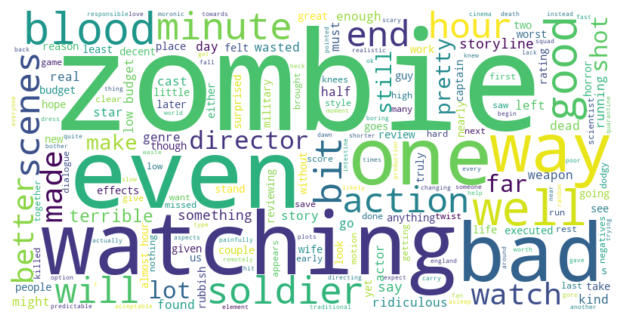

Wordcloud for The Professor and the Madman


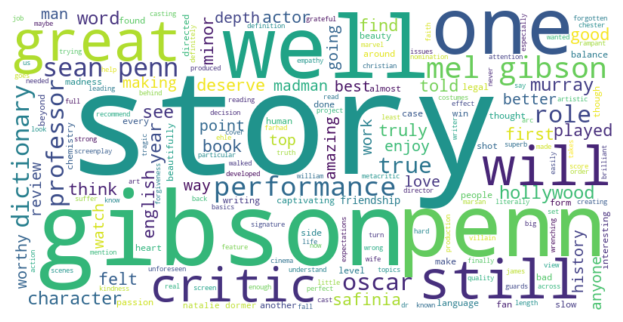

Wordcloud for James Bond 007: Spectre


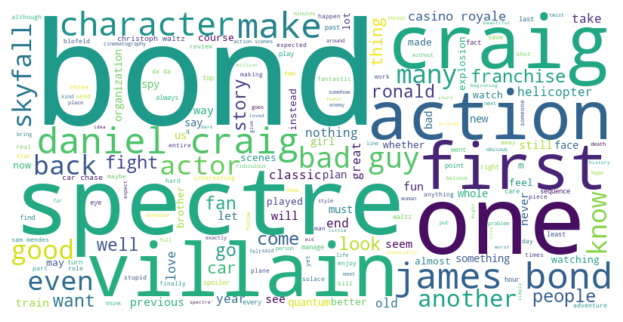

Wordcloud for Cinderella


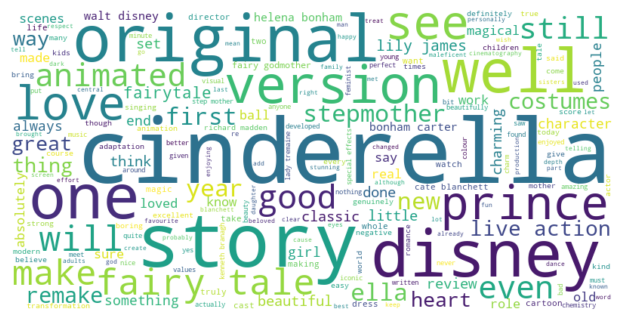

Wordcloud for Mamma Mia! Here We Go Again!


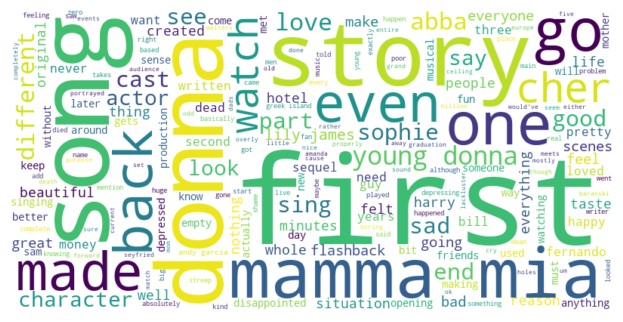

Wordcloud for Nachts im Museum - Das geheimnisvolle Grabmal


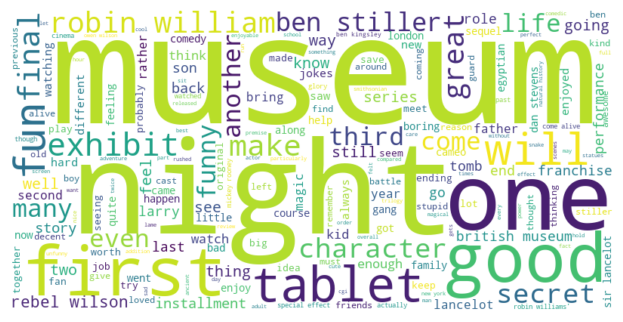

Wordcloud for Christopher Robin


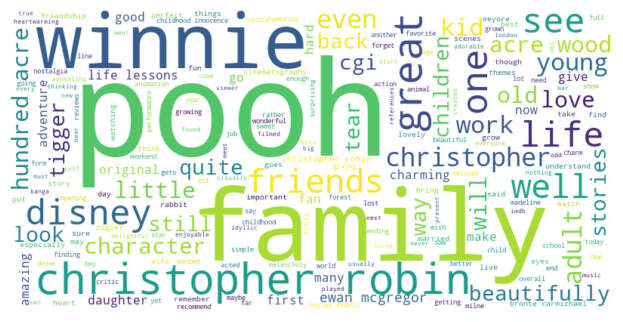

Wordcloud for Exodus: Götter und Könige


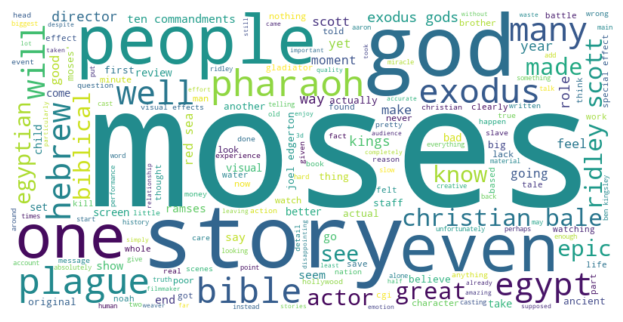

Wordcloud for Dirty Grandpa


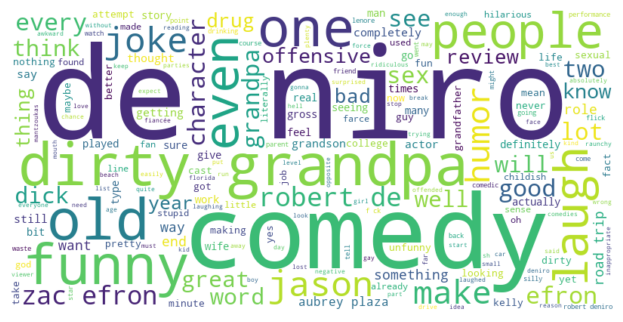

Wordcloud for The November Man


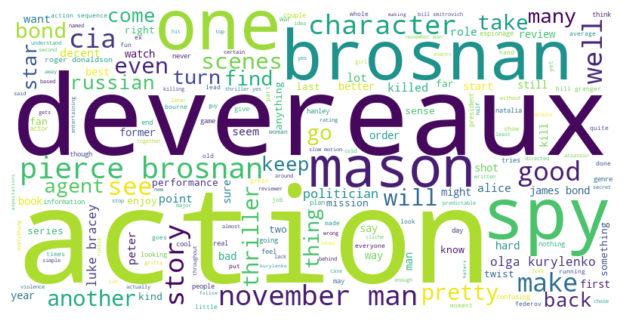

In [12]:
# Loop to create word cloud for first 10 movies
count = 0
for i in range(0, 10):
    text = reviewsdf.user_review[count]
    
    # Format the display of the word cloud
    wordcloud = WordCloud(stopwords=stopwords, background_color="white", width=800, height=400).generate(text)
    fig = plt.figure(figsize=(8, 4), dpi=100)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    
    # Display movie name and its word cloud
    print("Wordcloud for " + str(reviewsdf["movie"].iloc[i]))
    plt.show()
    count +=1